# RAMP: Picture reconstruction
*Alexia Allal, Gabriel Buffet, Stéphane Dumas, Nicolas Giraudet de Boudemange, Sébastien Mandela Yvon, Jérémy Pinault from IPP/M2DS*

AJOUTER LOGO IPP
<!-- <div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="left"; style="background-color:transparent; width: 40%;">
        <a href="https://dataia.eu">
            <img src="https://github.com/ramp-kits/tephra/raw/main/img/DATAIA-h.png" width="450px"/>
        </a>
    </td>
    <td align="right"; style="background-color:transparent; width: 40%;">
        <a href="https://www.geops.universite-paris-saclay.fr/">
            <img src="https://github.com/ramp-kits/tephra/raw/main/img/LOGO-GEOPS-2020-1024x488-1.jpg" width="350px"/>
        </a>
    </td>
  </tr>
 </table>
</div> -->


CHANGER TABLE DES MATIERES
## Table of Contents
* [Introduction](#introduction)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Requirements](#requirements)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>
The Unsplash Dataset is made up of over 350,000+ contributing global photographers and data sourced from hundreds of millions of searches across a nearly unlimited number of uses and contexts. Due to the breadth of intent and semantics contained within the Unsplash dataset, it enables new opportunities for research and learning.

The Unsplash Dataset is offered in two datasets:

* the Lite dataset: available for commercial and noncommercial usage, containing 25k nature-themed Unsplash photos, 25k keywords, and 1M searches
* the Full dataset: available for noncommercial usage, containing 5.4M+ high-quality Unsplash photos, 5M keywords, and over 250M searches

As the Unsplash library continues to grow, we’ll release updates to the dataset with new fields and new images, with each subsequent release being [semantically versioned](https://semver.org/).

We welcome any feedback regarding the content of the datasets or their format. With your input, we hope to close the gap between the data we provide and the data that you would like to leverage. You can [open an issue](https://github.com/unsplash/datasets/issues/new/choose) to report a problem or to let us know what you would like to see in the next release of the datasets.

For more on the Unsplash Dataset, see the [announcement](https://unsplash.com/blog/the-unsplash-dataset/) and [site](https://unsplash.com/data).

To create this challenge, we use the Lite dataset and we downgrade the quality of the images.

The goal of our challenge is to reconstruct the original pictures.

## The dataset <a class="anchor" id="dataset"></a>


In the Dataset, you will find the original picture (the ground truth) that you must to reconstruct with a low resolution version of this image.

The low resolution image has been obtained with a simple downsampling by a factor of 5 in each spatial dimension and conversion to black & white.

For example, if the original picture has a shape of (800, 640, 3) (Height, Width, Channels), you will be provided with a low resolution version of the orginial picure with a shape (160, 128).

The Public Dataset you get access contains 15 000 pictures.

## Setup <a name=Setup></a>
### Prerequisites
The following cell will install the required package dependencies, if necessary. You can examine the file, `requirements.txt`, included in the repo to view the list of dependencies.


In [5]:
import sys
!{sys.executable} -m pip install -r requirements.txt

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7f/23/2333941006444e8e3a8078eb425ce56410ef7d76bc13ab3e9f6db5101705/matplotlib-3.8.3-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/f3/9e/8fb3f53144269d3fecdd8786d3a4686eeff55b9b35a3c0772a3f62f71e36/contourpy-1.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ca/99/00714ed717ba6436b3c68157f42f1d37453a60f7a0365048a4919f8dd7d1/fonttools-4.49.0-cp312-cp312-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.

# Data exploration <a name=data_exp></a>

## Data download

Data are avaialable on a public drive that we can retrieve with the download_data script

In [2]:
# Uncomment the following line to download data:
import download_data
# download_data.data_fetch()

Retrieving folder contents


Processing file 15_JmH8kON-UGzjYKTR2wfZAAvxGst2w1 Test.tgz
Processing file 12ZLgUo4Zq7_JbBsA5lxJznwZ3QDH1pxk Train.tgz


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=15_JmH8kON-UGzjYKTR2wfZAAvxGst2w1
From (redirected): https://drive.google.com/uc?id=15_JmH8kON-UGzjYKTR2wfZAAvxGst2w1&confirm=t&uuid=2d298353-d938-4739-901a-97a59569dd20
To: /Users/sdumas/Documents/MASTER_DS/Data_Camp/ZZ_Data_challenge_group/Git/picture_reconstruction/picture_reconstruction_dataset/Test.tgz
100%|██████████| 288M/288M [01:47<00:00, 2.69MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=12ZLgUo4Zq7_JbBsA5lxJznwZ3QDH1pxk
From (redirected): https://drive.google.com/uc?id=12ZLgUo4Zq7_JbBsA5lxJznwZ3QDH1pxk&confirm=t&uuid=f1083173-9cce-4a67-88da-b565c6395cc8
To: /Users/sdumas/Documents/MASTER_DS/Data_Camp/ZZ_Data_challenge_group/Git/picture_reconstruction/picture_reconstruction_dataset/Train.tgz
100%|██████████| 575M/575M [03:30<00:00, 2.73MB/s] 
Download completed


Then, we must decrypt the data.

In [3]:
import os
import subprocess
## Decrypt the data

# Uncomment the following lines to launch decrypt

os.chdir('picture_reconstruction_dataset')
subprocess.call(['tar', '-zxf', 'Train.tgz'])
subprocess.call(['tar', '-zxf', 'Test.tgz'])
os.chdir('..')

## Visualize data <a name=visualize></a>

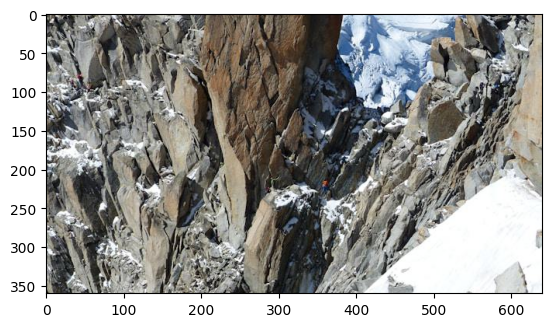

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_repo_train = 'picture_reconstruction_dataset/Train/'
img=mpimg.imread(data_repo_train +'H00000_hi.jpg')
imgplot = plt.imshow(img)

## Data Exploration <a class="anchor" id="exploration"></a>

### Training data

In [ ]:
train_df = pd.read_csv(...
train_df

In [ ]:
test_df = pd.read_csv(...
test_df

In [ ]:
train_df.columns

## Base model <a class="anchor" id="base_model"></a>

CREATION DES X_TRAIN ET Y_TRAIN, ET X_TEST ET Y_TEST

In [ ]:
X_train_df = ..
Y_train_df = ..

In [ ]:
X_test_df = ..
Y_test_df = ..

Imputation and scaling of the data.

In [25]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

Classifier: here we take a simple model, logistic regression.

In [184]:
clf = Pipeline(
    steps=[("transformer", numeric_transformer), ("classifier", LogisticRegression(max_iter=500))]
)

Let's fit the pipeline on train data:

In [ ]:
clf.fit(X_train, y_train)
clf

Evaluation on test data:

In [186]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred.shape

Accuracy score and balanced accuracy score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

Confusion matrix:

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)  

Balanced accuracy score will be used as the leaderboard score.

In [ ]:
balanced_accuracy_score(y_test, y_pred)

This is the score to beat in this challenge.

## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [tephra](http://www.ramp.studio/events/tephra_datacamp2023). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/tephra_datacamp2023/sandbox) and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/tephra_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/tephra_datacamp2023/leaderboard)) is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [38]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


class Classifier(BaseEstimator):
    def __init__(self):
        self.transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]
        )
        self.model = LogisticRegression(max_iter=500)
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        X = X.drop(["groups"], axis=1)
        self.pipe.fit(X, y)

    def predict(self, X):
        X = X.drop(["groups"], axis=1)
        return self.pipe.predict(X)

    def predict_proba(self, X):
        X = X.drop(["groups"], axis=1)
        return self.pipe.predict_proba(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [1]:
!ramp-test --submission starting_kit

zsh:1: command not found: ramp-test


## More information

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## Questions

Questions related to the starting kit should be asked on the issue tracker.